In [223]:
'''
2024 Olympic Swimming time predictor / comparitor

'''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

df = pd.read_csv("swimming.csv", encoding="latin1")


In [224]:
df.head()

,ï»¿Location,Year,Distance (in meters),Stroke,Gender,Team,Athlete,Results,Rank
0,Tokyo,2020.0,100m,Freestyle,Men,USA,Caeleb Dressel,47.02,1.0
1,Tokyo,2020.0,100m,Freestyle,Men,AUS,Kyle Chalmers,47.08,2.0
2,Tokyo,2020.0,100m,Freestyle,Men,ROC,Kliment Kolesnikov,47.44,3.0
3,Tokyo,2020.0,100m,Freestyle,Men,FRA,Maxime Grousset,47.72,4.0
4,Tokyo,2020.0,100m,Freestyle,Men,KOR,Sunwoo Hwang,47.82,5.0


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Location           104 non-null    object 
 1   Year                  104 non-null    float64
 2   Distance (in meters)  104 non-null    object 
 3   Stroke                104 non-null    object 
 4   Gender                104 non-null    object 
 5   Team                  104 non-null    object 
 6   Athlete               104 non-null    object 
 7   Results               104 non-null    float64
 8   Rank                  104 non-null    float64
dtypes: float64(3), object(6)
memory usage: 13.2+ KB


In [198]:
df.describe()

,Year,Results,Rank
count,104.000000,104.000000,104.000000
mean,1996.000000,49.475192,4.500000
std,15.039108,1.541678,2.302384
min,1972.000000,47.020000,1.000000
25%,1984.000000,48.085000,2.750000
50%,1996.000000,49.300000,4.500000
75%,2008.000000,50.510000,6.250000
max,2020.000000,52.920000,8.000000


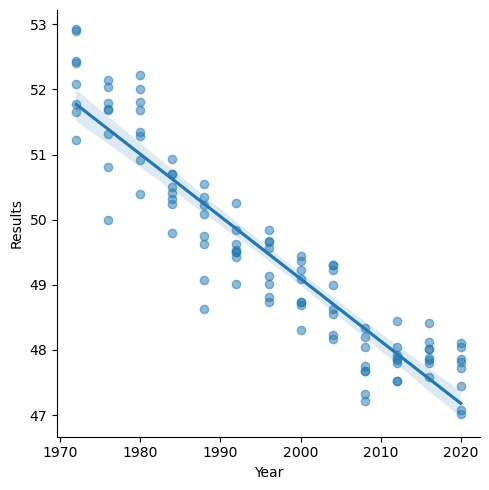

In [199]:
sb.lmplot(x= 'Year' , y = 'Results' , data = df, scatter_kws={'alpha' : 0.5})

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X = df[['Year', 'Rank']]
y = df['Results']

In [202]:
# Combine features and target
df_model = pd.concat([X, y], axis=1)

# Drop rows with any NaNs
df_model = df_model.dropna()

# Re-split X and y
X = df_model.drop(columns=["Results"])  # adjust target column name if different
y = df_model["Results"]

# Now split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [181]:
# training the model

In [189]:
from sklearn.linear_model import LinearRegression

In [193]:
lm = LinearRegression()

In [203]:
lm.fit(X_train, y_train)

LinearRegression()

In [204]:
lm.coef_

array([-0.09872134,  0.17727556])

In [205]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

          Coef
Year -0.098721
Rank  0.177276


In [139]:
# predictions

In [206]:
predictions = lm.predict(X_test)

In [207]:
predictions

array([48.74999426, 49.83804334, 49.66076778, 49.75737483, 49.36248945,
       51.73180171, 51.37725059, 49.71704057, 47.25112126, 46.50168476,
       47.64600664, 48.92726982, 50.84542391, 52.08635283, 50.94203096,
       47.210787  , 50.45053853, 48.25850183, 47.60567238, 48.04089201,
       51.59486041, 50.11192595, 48.35510888, 50.7647554 , 49.18521389,
       50.05565315, 48.13749906, 48.83066277, 48.47611165, 47.0738457 ,
       51.33691633, 47.42839682])

Text(0.5, 1.0, 'Evaluation of our language model')

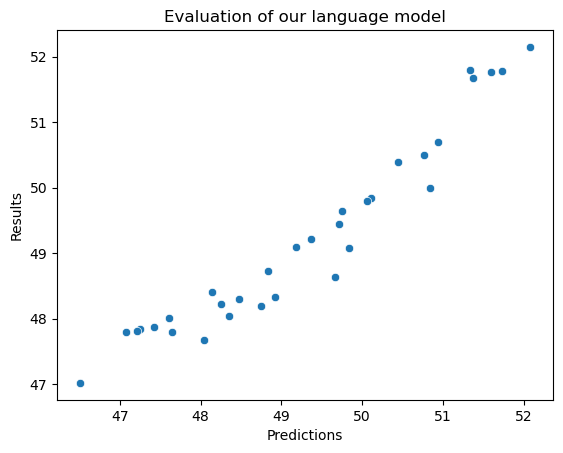

In [208]:
sb.scatterplot(x = predictions, y =  y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our language model")

In [209]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [210]:
print("Mean absolute error: ", mean_absolute_error(y_test, predictions))
print("Mean squared error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean absolute error:  0.3527376078662021
Mean squared error:  0.18845131612498506
RMSE:  0.4341097973151321


In [ ]:
# resuiduals

In [211]:
residuals = y_test - predictions

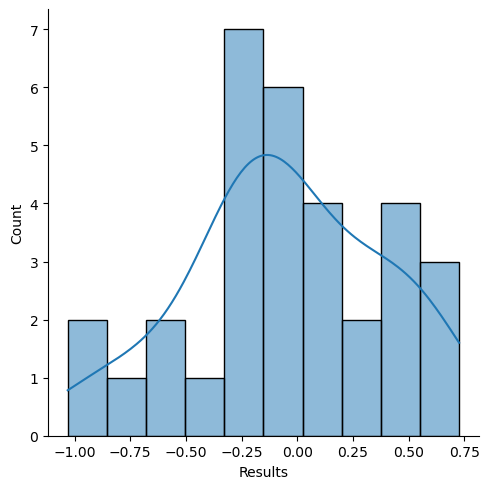

In [217]:
sb.displot(residuals, bins = 10 , kde=True)

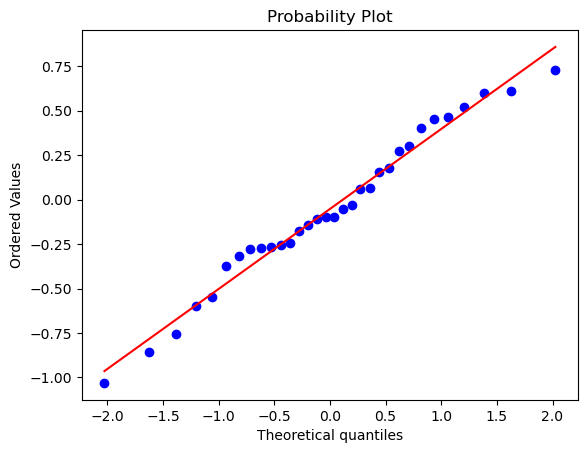

In [218]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()